# Gensim LDA 

# I think i need to stem -- check this
http://brandonrose.org/clustering

--remove name entity and places 
throw out everything but the nouns)= (not proper nouns) 
and model just on the nouns 

semi supervised topic model 
prep data thru python, run it thru mallet and then back to gensim 
https://www.youtube.com/channel/UCSarHXwz_HKtiZ3vNTX1rfw

https://www.youtube.com/channel/UCSarHXwz_HKtiZ3vNTX1rfw 


In [1]:
import nltk
import matplotlib
import os
import glob
import nltk, re, pprint
import pandas as pd
from nltk import word_tokenize
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
import mpld3
import gensim 
import numpy as np

In [2]:
textFiles = glob.glob("Books/*txt")
textFiles
type(textFiles)

list

In [246]:
d = {}
for textFile in textFiles:
    d['f{0}'.format(textFile)] = open(textFile).read()
    

In [243]:
d.keys()

dict_keys(['fBooks/text_38.txt', 'fBooks/text_10.txt', 'fBooks/text_264.txt', 'fBooks/text_270.txt', 'fBooks/text_258.txt', 'fBooks/text_310.txt', 'fBooks/text_304.txt', 'fBooks/text_338.txt', 'fBooks/text_112.txt', 'fBooks/text_106.txt', 'fBooks/text_107.txt', 'fBooks/text_113.txt', 'fBooks/text_339.txt', 'fBooks/text_305.txt', 'fBooks/text_311.txt', 'fBooks/text_259.txt', 'fBooks/text_271.txt', 'fBooks/text_265.txt', 'fBooks/text_11.txt', 'fBooks/text_39.txt', 'fBooks/text_13.txt', 'fBooks/text_273.txt', 'fBooks/text_267.txt', 'fBooks/text_298.txt', 'fBooks/text_307.txt', 'fBooks/text_313.txt', 'fBooks/text_105.txt', 'fBooks/text_111.txt', 'fBooks/text_139.txt', 'fBooks/text_138.txt', 'fBooks/text_110.txt', 'fBooks/text_104.txt', 'fBooks/text_312.txt', 'fBooks/text_306.txt', 'fBooks/text_299.txt', 'fBooks/text_266.txt', 'fBooks/text_272.txt', 'fBooks/text_12.txt', 'fBooks/text_16.txt', 'fBooks/text_276.txt', 'fBooks/text_262.txt', 'fBooks/text_289.txt', 'fBooks/text_302.txt', 'fBooks

In [236]:
# convert the book titles into a list
book_titles = list(d.keys())

# convert values into a list
book_text = list(d.values())

# see first items 
book_text[201][:2000]

'Dedication\n\n\n\n\n\nI dedicate this book to my friend A. Lynne Wall. She passed away in September 2017 and left a void in the lives of those who knew and loved her. Lynne was a staunch supporter of all things romance and with her passing our genre lost one of its brightest lights. May she rest in peace.\n\n\n\n\n\nContents\n\n\nCover\n\nTitle Page\n\nDedication\n\nPrologue\n\nChapter One\n\nChapter Two\n\nChapter Three\n\nChapter Four\n\nChapter Five\n\nChapter Six\n\nChapter Seven\n\nChapter Eight\n\nChapter Nine\n\nChapter Ten\n\nChapter Eleven\n\nChapter Twelve\n\nChapter Thirteen\n\nChapter Fourteen\n\nChapter Fifteen\n\nChapter Sixteen\n\nChapter Seventeen\n\nChapter Eighteen\n\nChapter Nineteen\n\nChapter Twenty\n\nDear Reader\n\nAnnouncement Forbidden\n\nBreathless\n\n\n\n\n\nAbout the Author\n\nBy Beverly Jenkins\n\nCopyright\n\nAbout the Publisher\n\n\n\n\n\nPrologue\n\n\n\n\nMy dearest Miss Carmichael,\n\nYou have my deepest gratitude for agreeing to be my wife and the mot

## Stopwords, stemming, and tokenizing 

This section is focused on defining some functions to manipulate the synopses. First, I load NLTK's list of English stop words. Stop words are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [6]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Next I import the Snowball Stemmer which is actually part of NLTK. Stemming is just the process of breaking a word down into its root.

In [15]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# import these modules 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

Below I define two functions:

* tokenize_and_stem: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token
* tokenize_only: tokenizes the synopsis only

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. Guess what, I do want to do that!

In [16]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


def tokenize_and_lemmatize(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lems = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lems


Below I use my stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized.

# Latent Diriechlet Allocation Models

## Latent Dirichlet Allocation¶

This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the top 100 film synopses. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. There is quite a good high-level overview of probabilistic topic models by one of the big names in the field, David Blei, available in the Communications of the ACM here. Incidentally, Blei was one of the authors of the seminal paper on LDA.

For my implementaiton of LDA, I use the Gensim pacakage. I'm going to preprocess the synopses a bit differently here, and first I define a function to remove any proper noun.

In [21]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

Since the above function is just based on capitalization, it is prone to remove words at the beginning of sentences. So, I wrote the below function using NLTK's part of speech tagger. However, it took way too long to run across all synopses, so I stuck with the above.

In [139]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

# Filter for only nouns
def noun_only(text):
    pos_comment = nltk.pos_tag(text)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

Here I run the actual text processing (removing of proper nouns, tokenization, removal of stop words)

In [140]:
from gensim import corpora, models, similarities 

#tokenize
%time tokenized_text = [tokenize_and_lemmatize(text) for text in book_text]

#remove stop words
%time preprocess = [[word for word in text if word not in stopwords] for text in tokenized_text]

%time texts = [strip_proppers_POS(doc) for doc in preprocess]

CPU times: user 9min 28s, sys: 9.82 s, total: 9min 38s
Wall time: 11min 33s
CPU times: user 52 s, sys: 2.19 s, total: 54.2 s
Wall time: 56.9 s
CPU times: user 18min 40s, sys: 9.6 s, total: 18min 49s
Wall time: 21min 47s


Below are some Gensim specific conversions; I also filter out extreme words (see inline comment)

# Deciding the number of topics using coheence

NOTE: do NOT rerun 

In [67]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=k, 
               id2word = dictionary, passes=40,
               iterations=100, chunksize = 1000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [69]:
coherence

[(5, 0.4620468844512092),
 (6, 0.525782629649261),
 (7, 0.5063341083711969),
 (8, 0.49983180163211605),
 (9, 0.4729835295354612),
 (10, 0.4383490697801246),
 (11, 0.49519479966949187),
 (12, 0.4549115020282981),
 (13, 0.4630012907312598),
 (14, 0.4830318189001028),
 (15, 0.43568665234116566),
 (16, 0.4605383067175865),
 (17, 0.46287757720415645),
 (18, 0.4516778417105851),
 (19, 0.4670034417823333),
 (20, 0.4595017957838663),
 (21, 0.3910624567714064),
 (22, 0.4686482450397725),
 (23, 0.456696541896699),
 (24, 0.4462990421184993)]

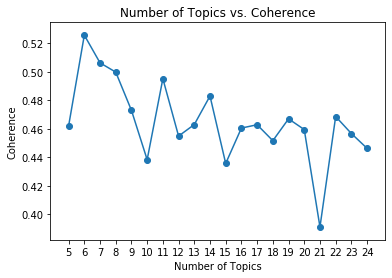

In [71]:
import matplotlib.pyplot as plt

x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

The actual model runs below. I took 100 passes to ensure convergence, but you can see that it took my machine 13 minutes to run. My chunksize is larger than the corpus so basically all synopses are used per pass. I should optimize this, and Gensim has the capacity to run in parallel. I'll likely explore this further as I use the implementation on larger corpora.

## First LDA Model

In [133]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [32]:
%time lda = models.LdaModel(corpus, num_topics=40,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 1h 44min 46s, sys: 2min 1s, total: 1h 46min 48s
Wall time: 1h 4min 4s


Each topic has a set of words that defines it, along with a certain probability.

In [33]:
lda.show_topics(40)

[(0,
  '0.000*"n\'t" + 0.000*"\'s" + 0.000*"shit" + 0.000*"\'d" + 0.000*"\'m" + 0.000*"\'re" + 0.000*"fuck" + 0.000*"apartment" + 0.000*"hospital" + 0.000*"mom"'),
 (1,
  '0.000*"shit" + 0.000*"\'s" + 0.000*"n\'t" + 0.000*"hospital" + 0.000*"\'d" + 0.000*"na" + 0.000*"apartment" + 0.000*"fi" + 0.000*"church" + 0.000*"gon"'),
 (2,
  '0.000*"n\'t" + 0.000*"shit" + 0.000*"\'s" + 0.000*"church" + 0.000*"fuck" + 0.000*"gon" + 0.000*"fi" + 0.000*"horse" + 0.000*"club" + 0.000*"mom"'),
 (3,
  '0.000*"n\'t" + 0.000*"\'s" + 0.000*"shit" + 0.000*"\'d" + 0.000*"na" + 0.000*"\'m" + 0.000*"fuck" + 0.000*"mom" + 0.000*"gon" + 0.000*"truck"'),
 (4,
  '0.000*"shit" + 0.000*"n\'t" + 0.000*"fuck" + 0.000*"\'s" + 0.000*"na" + 0.000*"fucking" + 0.000*"gon" + 0.000*"club" + 0.000*"apartment" + 0.000*"mom"'),
 (5,
  '0.004*"strolled" + 0.003*"smirked" + 0.003*"shouted" + 0.002*"winked" + 0.002*"giggled" + 0.002*"elevator" + 0.002*"traveled" + 0.002*"mon" + 0.002*"causing" + 0.002*"rocked"'),
 (6,
  '0.000*"

Here, I convert the topics into just a list of the top 20 words in each topic. You can see a similar breakdown of topics as I identified using k-means including a war/family topic and a more clearly war/epic topic.

In [38]:
topics_matrix = lda.show_topics(formatted=False, num_words=100)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

['("\'s", 1.1111408e-05)', '("n\'t", 1.11113795e-05)', "('shit', 1.1111283e-05)", "('mom', 1.1111198e-05)", "('na', 1.1111187e-05)", "('dad', 1.1111146e-05)", "('gon', 1.1111142e-05)", "('apartment', 1.1111139e-05)", '("\'d", 1.1111134e-05)', "('police', 1.1111117e-05)", "('club', 1.1111117e-05)", "('cousin', 1.1111113e-05)", "('photo', 1.1111113e-05)", "('fucking', 1.1111109e-05)", "('couch', 1.1111102e-05)", "('hospital', 1.1111094e-05)", "('fuck', 1.1111093e-05)", "('movie', 1.1111092e-05)", "('flight', 1.1111084e-05)", "('letter', 1.1111084e-05)", "('song', 1.1111084e-05)", '("\'m", 1.1111083e-05)', "('pregnant', 1.1111083e-05)", "('text', 1.1111083e-05)", "('reply', 1.1111082e-05)", "('dog', 1.1111082e-05)", "('truck', 1.1111081e-05)", "('camera', 1.1111075e-05)", "('cake', 1.11110685e-05)", "('gun', 1.11110685e-05)", "('owner', 1.1111068e-05)", "('security', 1.1111066e-05)", "('college', 1.1111066e-05)", "('despite', 1.1111065e-05)", "('client', 1.1111065e-05)", "('cook', 1.11110

# Visualize topics

In [39]:
import pyLDAvis.gensim

lda_visualization = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False, mds='mmds')

FileNotFoundError: [Errno 2] No such file or directory: 'https://cdn.rawgit.com/bmabey/pyLDAvis/files/ldavis.v1.0.0.css'

In [57]:
pyLDAvis.display(lda_visualization)

In [46]:
lda_visualization.topic_info

,Term,Freq,Total,Category,logprob,loglift
16941,n't,12268.000000,12268.000000,Default,30.0000,30.0000
12864,'s,10826.000000,10826.000000,Default,29.0000,29.0000
24766,'d,4718.000000,4718.000000,Default,28.0000,28.0000
9613,shit,7064.000000,7064.000000,Default,27.0000,27.0000
16033,'m,2976.000000,2976.000000,Default,26.0000,26.0000
1983,mom,3155.000000,3155.000000,Default,25.0000,25.0000
2944,song,1910.000000,1910.000000,Default,24.0000,24.0000
32101,fi,1865.000000,1865.000000,Default,23.0000,23.0000
8258,fucking,3529.000000,3529.000000,Default,22.0000,22.0000
798,dad,2581.000000,2581.000000,Default,21.0000,21.0000


In [72]:
from gensim.models import CoherenceModel

# Compute Perplexity
print ('Perplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

Perplexity:  -10.419856237549853


## Second LDA model

This one will beusing the coherence model results, and use 8 topics 

In [73]:
%time lda_mod2 = models.LdaModel(corpus, num_topics=8,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 44min 42s, sys: 3min 55s, total: 48min 37s
Wall time: 30min 59s


In [76]:
lda_mod2.show_topics(8)

[(0,
  '0.030*"fi" + 0.010*"fl" + 0.004*"rst" + 0.003*"nd" + 0.003*"ed" + 0.003*"offi" + 0.003*"truck" + 0.002*"police" + 0.002*"murder" + 0.002*"ngers"'),
 (1,
  '0.142*"n\'t" + 0.124*"\'s" + 0.055*"\'d" + 0.034*"\'m" + 0.020*"\'re" + 0.020*"\'ll" + 0.016*"\'ve" + 0.008*"ca" + 0.005*"ai" + 0.004*"wo"'),
 (2,
  '0.003*"horse" + 0.002*"church" + 0.002*"slave" + 0.002*"land" + 0.002*"gown" + 0.002*"porch" + 0.002*"train" + 0.002*"folk" + 0.002*"war" + 0.002*"wagon"'),
 (3,
  '0.018*"shit" + 0.010*"gon" + 0.010*"na" + 0.010*"fuck" + 0.006*"dick" + 0.005*"nigga" + 0.005*"bitch" + 0.004*"wit" + 0.004*"pussy" + 0.004*"yo"'),
 (4,
  '0.006*"asks" + 0.004*"shit" + 0.003*"lean" + 0.002*"al" + 0.002*"fucking" + 0.002*"na" + 0.002*"mom" + 0.002*"lift" + 0.002*"dad" + 0.002*"fuck"'),
 (5,
  '0.005*"fucking" + 0.003*"cock" + 0.003*"fuck" + 0.003*"shit" + 0.003*"murmured" + 0.002*"towards" + 0.002*"couch" + 0.002*"muttered" + 0.002*"realised" + 0.002*"shoved"'),
 (6,
  '0.002*"hospital" + 0.002*"sof

In [77]:
# Compute Perplexity
print ('Perplexity: ', lda_mod2.log_perplexity(corpus)) 

Perplexity:  -9.331853193862777


## Third LDA model 

Using number of topics of 14

In [79]:
%time lda_mod3 = models.LdaModel(corpus, num_topics=14,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 46min 10s, sys: 4min, total: 50min 11s
Wall time: 39min 23s


In [80]:
# Compute Perplexity
print ('Perplexity: ', lda_mod3.log_perplexity(corpus)) 

Perplexity:  -9.500157584757874


In [81]:
lda_mod3.show_topics(14)

[(0,
  '0.003*"murmured" + 0.003*"cock" + 0.003*"fucking" + 0.002*"muttered" + 0.002*"pussy" + 0.002*"fuck" + 0.002*"shoved" + 0.002*"tugged" + 0.002*"jerked" + 0.001*"lust"'),
 (1,
  '0.004*"horse" + 0.003*"slave" + 0.003*"church" + 0.003*"wagon" + 0.003*"land" + 0.003*"gown" + 0.002*"folk" + 0.002*"porch" + 0.002*"train" + 0.002*"war"'),
 (2,
  '0.026*"shit" + 0.016*"gon" + 0.015*"fuck" + 0.015*"na" + 0.010*"nigga" + 0.008*"dick" + 0.008*"bitch" + 0.008*"wit" + 0.007*"yo" + 0.007*"wan"'),
 (3,
  '0.005*"although" + 0.003*"realised" + 0.002*"towards" + 0.002*"pregnant" + 0.002*"sexual" + 0.002*"sofa" + 0.002*"discovered" + 0.002*"security" + 0.001*"perhaps" + 0.001*"inhaled"'),
 (4,
  '0.136*"n\'t" + 0.119*"\'s" + 0.052*"\'d" + 0.033*"\'m" + 0.019*"\'re" + 0.019*"\'ll" + 0.015*"\'ve" + 0.008*"ca" + 0.005*"ai" + 0.004*"wo"'),
 (5,
  '0.009*"duke" + 0.004*"carriage" + 0.003*"horse" + 0.003*"cousin" + 0.003*"letter" + 0.002*"gown" + 0.002*"dear" + 0.002*"tugged" + 0.002*"glove" + 0.002*"

## Fourth LDA Model 

Using 20 topics

In [141]:
%time lda_mod4 = models.LdaModel(corpus, num_topics=20,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 50min 27s, sys: 4min 21s, total: 54min 49s
Wall time: 30min 43s


In [142]:
# Compute Perplexity
print ('Perplexity: ', lda_mod4.log_perplexity(corpus)) 

Perplexity:  -9.683162795212587


In [143]:
lda_mod4.show_topics(20)

[(0,
  '0.012*"duke" + 0.006*"carriage" + 0.004*"horse" + 0.004*"cousin" + 0.003*"letter" + 0.003*"dear" + 0.003*"gown" + 0.003*"glove" + 0.002*"tugged" + 0.002*"parlor"'),
 (1,
  '0.010*"kingdom" + 0.008*"race" + 0.007*"realised" + 0.006*"bike" + 0.004*"castle" + 0.004*"painting" + 0.003*"grandmother" + 0.003*"beach" + 0.003*"calendar" + 0.003*"motorcycle"'),
 (2,
  '0.004*"church" + 0.003*"porch" + 0.002*"folk" + 0.002*"studied" + 0.002*"seated" + 0.002*"sheriff" + 0.002*"truck" + 0.002*"hat" + 0.002*"mama" + 0.002*"coat"'),
 (3,
  '0.057*"fi" + 0.017*"fl" + 0.016*"al" + 0.013*"ed" + 0.012*"e" + 0.010*"l" + 0.009*"rst" + 0.007*"ing" + 0.007*"stil" + 0.007*"tel"'),
 (4,
  '0.000*"shit" + 0.000*"\'s" + 0.000*"fucking" + 0.000*"fi" + 0.000*"elevator" + 0.000*"hospital" + 0.000*"college" + 0.000*"sofa" + 0.000*"n\'t" + 0.000*"police"'),
 (5,
  '0.006*"\'d" + 0.003*"trouser" + 0.002*"uncle" + 0.002*"corset" + 0.002*"vibrator" + 0.002*"paddle" + 0.002*"orgasm" + 0.002*"bracelet" + 0.002*"g

## Visualize LDA Model 4

In [144]:
%time lda_viz4 = pyLDAvis.gensim.prepare(lda_mod4, corpus, dictionary, sort_topics=False, mds='mmds')

CPU times: user 38.7 s, sys: 1min 55s, total: 2min 34s
Wall time: 10h 17min 14s


In [145]:
pyLDAvis.display(lda_viz4)

In [146]:
lda_df = lda_viz4.topic_info

In [147]:
lda_df['Category'].unique()

array(['Default', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5',
       'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11',
       'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17',
       'Topic18', 'Topic19', 'Topic20'], dtype=object)

In [148]:
no_def = lda_df[lda_df['Category'] != 'Default']
no_def.head()

,Term,Freq,Total,Category,logprob,loglift
29487,countess,168.485900,169.147068,Topic1,-6.0768,3.6007
29401,bedchamber,102.104547,102.754765,Topic1,-6.5777,3.5982
29591,footman,100.121686,100.771959,Topic1,-6.5973,3.5981
29491,cravat,95.275877,95.926065,Topic1,-6.6469,3.5978
29816,pianoforte,91.533645,92.183796,Topic1,-6.6870,3.5975


In [191]:
all_topics = {}
num_terms = 15 # Adjust number of words to represent each topic
lambd = .5 # Adjust this accordingly based on tuning above
for i in range(1,20): #Adjust this to reflect number of topics chosen for final LDA model
    topic = lda_viz4.topic_info[lda_viz4.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [192]:
all_df = pd.DataFrame.from_dict(all_topics, orient = 'index')

all_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 1,duke,carriage,countess,earl,barrister,waistcoat,lord,bedchamber,footman,cravat,vicar,baron,pianoforte,viscount,governess
Topic 2,kingdom,ara,castle,alliance,realised,overthrown,bike-riding,bike,moodier,race,vice-president,motorcycle,eighteen-wheeler,coup,hare-brained
Topic 3,church,porch,folk,sheriff,mill,seated,mayor,studied,piano,hog,county,hat,mama,war,sensed
Topic 4,fi,fl,al,ed,e,rst,stil,tel,ing,cal,pul,nd,wil,offi,l
Topic 5,make—,ambush—or,testosterone-driven,bushido—which,broth—to,brother—or,breakfast—which,bra—her,blank—but,best—the,being—well,basically—the,attention—but,arguments—and,anybody-
Topic 6,www.evernightpublishing.com,smoke-wood,one-to-one,buy-back,suya,lippy,www.evernightpublishing.com/kiru-taye,marbling,stimulator,demerit,armoured,wall-to-ceiling,unilaterally,paddle,vibrator
Topic 7,shit,mom,na,fucking,dad,fuck,gon,text,couch,video,pissed,asshole,ta,bullshit,truck
Topic 8,slave,wagon,horse,saloon,buggy,gown,ranch,soldier,ship,crate,train,marshal,rein,rode,saddle
Topic 9,dancer,choreography,filming,rehearsal,producer,telenovela,choreographer,behind-the-scenes,foxtrot,footage,showmance,rumba,episode,camera,costars
Topic 10,n't,'s,'d,'m,'re,'ll,'ve,nigga,yo,wit,ca,fuckin,gon,fuck,ai


In [163]:
pyLDAvis.save_html(lda_viz4, 'lda.html')

### Most relevant /likely topics for a word

More info here: https://github.com/RBrynsvold/Capstone/blob/master/notebooks/lda_presentation.ipynb 

In [181]:
france_tops = lda.get_term_topics(dictionary.token2id['dick'], minimum_probability=0.001)
france_tops #, get_topic_desig(france_tops)

[(19, 0.0014675026), (25, 0.007223838), (36, 0.0011525746)]

### Heatmap 

https://github.com/FelixChop/MediumArticles/blob/master/LDA-BBC.ipynb

In [200]:
lda_mod4[corpus[0]]

[(2, 0.7400955), (6, 0.22259021), (12, 0.018641524), (13, 0.013352188)]

In [205]:
topics = [lda_mod4[corpus[i]] for i in range(len(book_text))]

In [207]:
topics

[[(2, 0.7400933), (6, 0.22261599), (12, 0.018220453), (13, 0.013752587)],
 [(2, 0.048250217),
  (12, 0.2032942),
  (14, 0.037610944),
  (15, 0.08711231),
  (18, 0.6135119)],
 [(12, 0.8048596), (15, 0.19494426)],
 [(2, 0.035851296),
  (6, 0.09920227),
  (7, 0.0160224),
  (12, 0.13528992),
  (15, 0.7000039)],
 [(0, 0.010568651),
  (2, 0.027598586),
  (6, 0.076393925),
  (7, 0.011301425),
  (12, 0.16638198),
  (15, 0.22515407),
  (18, 0.4825449)],
 [(2, 0.019474471),
  (6, 0.4592177),
  (12, 0.19151215),
  (16, 0.07355832),
  (18, 0.25381896)],
 [(6, 0.31682983), (12, 0.24969389), (15, 0.12569708), (18, 0.30672148)],
 [(18, 0.9998428)],
 [(6, 0.09253325),
  (12, 0.14996983),
  (14, 0.04857448),
  (15, 0.39403585),
  (18, 0.31236064)],
 [(2, 0.15525246),
  (6, 0.029151535),
  (7, 0.14667396),
  (12, 0.16740334),
  (15, 0.36895025),
  (18, 0.13224766)],
 [(12, 0.20661919), (15, 0.41371688), (18, 0.37917218)],
 [(2, 0.16066875),
  (12, 0.22381492),
  (14, 0.010404568),
  (15, 0.2666517),
  (

In [208]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

# test function 
topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [211]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=20) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.0,0.740093,0.0,0,0.0,0.222616,0.000000,0.0,0.0,0.0,0,0.018220,0.013753,0.000000,0.000000,0.0,0.0,0.000000,0
1,0.000000,0.0,0.048250,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0.203294,0.000000,0.037611,0.087112,0.0,0.0,0.613512,0
2,0.000000,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0.804860,0.000000,0.000000,0.194944,0.0,0.0,0.000000,0
3,0.000000,0.0,0.035851,0.0,0,0.0,0.099202,0.016022,0.0,0.0,0.0,0,0.135290,0.000000,0.000000,0.700004,0.0,0.0,0.000000,0
4,0.010569,0.0,0.027599,0.0,0,0.0,0.076394,0.011301,0.0,0.0,0.0,0,0.166382,0.000000,0.000000,0.225154,0.0,0.0,0.482545,0


In [230]:
document_topic['max_val'] = document_topic[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                       17, 18, 19]].max(axis=1)
document_topic['max_col'] = document_topic[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                       17, 18, 19]].idxmax(axis=1)

document_topic.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,sum,max,max_val,max_col
0,0.000000,0.0,0.740093,0.0,0,0.0,0.222616,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0,1.989365,0.740093,0.740093,2
1,0.000000,0.0,0.048250,0.0,0,0.0,0.000000,0.000000,0.0,0.0,...,0.037611,0.087112,0.000000,0.0,0.613512,0,1.979559,0.613512,0.613512,18
2,0.000000,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.194944,0.000000,0.0,0.000000,0,1.999608,0.804860,0.804860,12
3,0.000000,0.0,0.035851,0.0,0,0.0,0.099202,0.016022,0.0,0.0,...,0.000000,0.700004,0.000000,0.0,0.000000,0,1.972740,0.700004,0.700004,15
4,0.010569,0.0,0.027599,0.0,0,0.0,0.076394,0.011301,0.0,0.0,...,0.000000,0.225154,0.000000,0.0,0.482545,0,1.999887,0.482545,0.482545,18
5,0.000000,0.0,0.019474,0.0,0,0.0,0.459218,0.000000,0.0,0.0,...,0.000000,0.000000,0.073558,0.0,0.253819,0,1.995163,0.459218,0.459218,6
6,0.000000,0.0,0.000000,0.0,0,0.0,0.316830,0.000000,0.0,0.0,...,0.000000,0.125697,0.000000,0.0,0.306721,0,1.997885,0.316830,0.316830,6
7,0.000000,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.999843,0,1.999686,0.999843,0.999843,18
8,0.000000,0.0,0.000000,0.0,0,0.0,0.092533,0.000000,0.0,0.0,...,0.048574,0.394036,0.000000,0.0,0.312361,0,1.994948,0.394036,0.394036,15
9,0.000000,0.0,0.155252,0.0,0,0.0,0.029152,0.146674,0.0,0.0,...,0.000000,0.368950,0.000000,0.0,0.132248,0,1.999358,0.368950,0.368950,15


In [220]:
document_topic.sort_values(14, ascending=False)[14].head(50)

189    0.988252
188    0.915496
158    0.891788
207    0.831760
230    0.814301
157    0.750166
182    0.747914
166    0.723816
208    0.717658
165    0.673456
139    0.662833
214    0.647076
144    0.639933
213    0.638291
85     0.632494
237    0.628961
183    0.613257
292    0.203282
299    0.124363
43     0.107377
204    0.103235
47     0.100377
90     0.098953
117    0.098393
34     0.089297
260    0.084205
114    0.066493
38     0.065368
23     0.064653
118    0.064231
46     0.063459
301    0.055407
138    0.054335
274    0.052719
184    0.051314
8      0.048574
283    0.048486
135    0.046803
103    0.046580
282    0.046288
98     0.044424
252    0.042102
255    0.041318
111    0.039916
331    0.039864
132    0.039314
68     0.039114
1      0.037611
275    0.037194
324    0.036224
Name: 14, dtype: float64

### Visualize the topics in each book

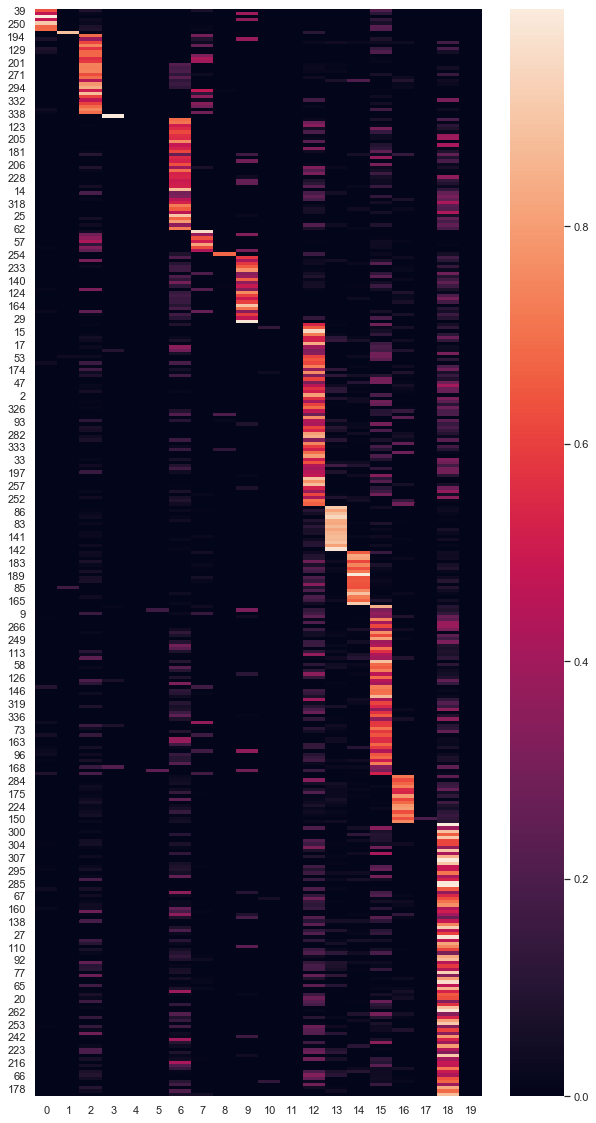

In [215]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

### Number of topics

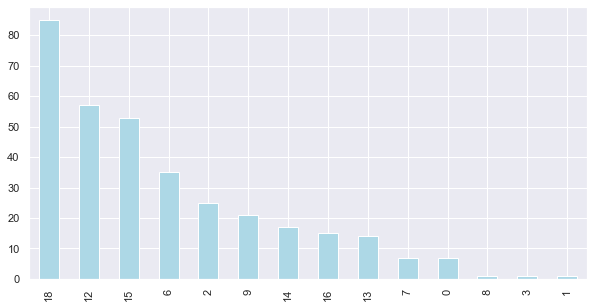

In [216]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [232]:
# define function that returns the max topic 
df_dups = document_topic[document_topic.duplicated('max_col', keep=False)].sort_values('max_col')
df_dups

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,sum,max,max_val,max_col
39,0.635257,0.0,0.081280,0.0,0,0.0,0.000000,0.066742,0.000000,0.000000,...,0.000000,0.210113,0.000000,0.0,0.000000,0,1.986786,0.635257,0.635257,0
60,0.472627,0.0,0.018762,0.0,0,0.0,0.000000,0.000000,0.000000,0.397229,...,0.000000,0.109641,0.000000,0.0,0.000000,0,1.996518,0.472627,0.472627,0
71,0.999249,0.0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0,1.998498,0.999249,0.999249,0
250,0.909598,0.0,0.026287,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.058932,0.000000,0.0,0.000000,0,1.989636,0.909598,0.909598,0
298,0.478027,0.0,0.037510,0.0,0,0.0,0.000000,0.000000,0.000000,0.356270,...,0.000000,0.124191,0.000000,0.0,0.000000,0,1.991997,0.478027,0.478027,0
265,0.675549,0.0,0.072506,0.0,0,0.0,0.000000,0.012767,0.000000,0.000000,...,0.000000,0.230196,0.000000,0.0,0.000000,0,1.982036,0.675549,0.675549,0
54,0.685865,0.0,0.082037,0.0,0,0.0,0.000000,0.016554,0.000000,0.000000,...,0.000000,0.213893,0.000000,0.0,0.000000,0,1.996697,0.685865,0.685865,0
194,0.000000,0.0,0.690633,0.0,0,0.0,0.000000,0.298813,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0,1.978893,0.690633,0.690633,2
193,0.068270,0.0,0.386394,0.0,0,0.0,0.000000,0.086532,0.000000,0.375037,...,0.000000,0.075941,0.000000,0.0,0.000000,0,1.984348,0.386394,0.386394,2
177,0.000000,0.0,0.561795,0.0,0,0.0,0.000000,0.424129,0.000000,0.000000,...,0.000000,0.014021,0.000000,0.0,0.000000,0,1.999890,0.561795,0.561795,2
